# Cat vs Dogs

## Librerías
- Instalación de librerías y módulos
- Carga de librerías y módulos


In [ ]:
!pip install fastai==1.0.61

In [2]:
import os
import PIL.Image
import numpy as np
from shutil import copy
from pathlib import Path
from random import randint, shuffle, seed

from fastai.vision import *

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se define una función para garantizar la reproducibilidad de los resultados.

In [3]:
def random_seed(seed_value):
    seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

SEED = 42
random_seed(SEED)

Se instancian variables comunes.

In [4]:
lr = 1e-02
EPOCHS = 20
metrics = [error_rate,accuracy]

## Cat vs Dog
Cree en su drive dos folders con los nombres `perro` y `gato` respectivamente, coloque en cada uno 100 imágenes de perro y gato respectivamente a partir del dataset `Cat_Dog_Data` presente en la carpeta data.  

<img src="https://sites.google.com/site/catanddogforit/_/rsrc/1544445724727/config/customLogo.gif?revision=4"
     alt="cat_dog"
     style="float: left; margin-right: 10px;" />

Entrene un modelo usando `fastai` que sea el motor de inferencia de una aplicación como la que se muestra en el video `demo.mp4`. ¿Cuánta precisión obtuvo en el modelo?

### Carga Datos

In [5]:
random_seed(SEED)

Se instancia el directorio en el que se encuentran las imágenes de entrenamiento y testeo.

In [6]:
path_cat_dog = Path("./drive/MyDrive/cat_dog/train")

Se cargan las imágenes en el directorio especificado anteriormente.

In [7]:
data_cat_dog = ImageDataBunch.from_folder(path_cat_dog, train="training", valid="testing", size=256,seed=SEED, bs=16, num_workers=4).normalize(imagenet_stats)

Se muestran algunos ejemplos de los datos que se cargaron para el entrenamiento del modelo.

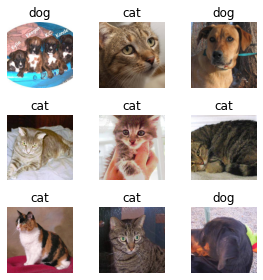

In [8]:
data_cat_dog.show_batch(rows=3, figsize=(4,4))

Se detallan características relevantes de los datos de entrenamiento y testeo.

In [9]:
print(f"Distinct classes: {data_cat_dog.classes}\nCount Distinct classes: {data_cat_dog.c}\nTraining Examples: {len(data_cat_dog.train_ds)}\nValidation examples: {len(data_cat_dog.valid_ds)}")

Distinct classes: ['cat', 'dog']
Count Distinct classes: 2
Training Examples: 200
Validation examples: 60


### Entrenamiento

Se instancia un modelo pre-entrenado el cual será entrenado con los datos especificados anteriormente.

In [10]:
learn_cat_dog = cnn_learner(data_cat_dog, models.resnet34, metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


Se procede a entrenar el modelo.

In [11]:
learn_cat_dog.fit(EPOCHS-5,slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.454632,1.695702,0.200000,0.800000,00:19
1,0.343241,0.176738,0.066667,0.933333,00:03
2,0.211809,0.057684,0.016667,0.983333,00:03
3,0.156096,0.153634,0.050000,0.950000,00:03
4,0.111688,0.103426,0.050000,0.950000,00:03
5,0.096685,0.062034,0.033333,0.966667,00:03
6,0.071296,0.202832,0.033333,0.966667,00:03
7,0.070915,0.021694,0.016667,0.983333,00:03
8,0.064398,0.032224,0.016667,0.983333,00:03
9,0.073152,0.042596,0.016667,0.983333,00:03


Se obtuvo una precisión del ~100%.

### Interpretación resultados
A continuación se analizarán métricas que permiten entender las falencias/fortalezas del modelo entrenado.

#### Tasa de Aprendizaje

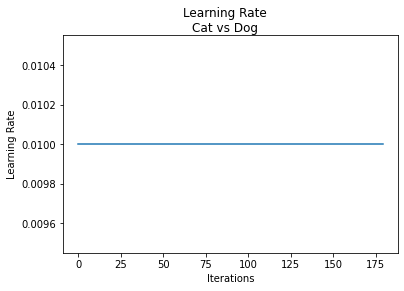

In [12]:
lr_cat_dog = learn_cat_dog.recorder.plot_lr(return_fig=True)
lr_cat_dog.suptitle('Learning Rate\nCat vs Dog')
plt.show()

No se apreciaron cambios en la tasa de aprendizaje ya que esta se fijó a un valor constante:

$$l_r = 1*10^{-2}$$

#### Tasa de error - Precisión

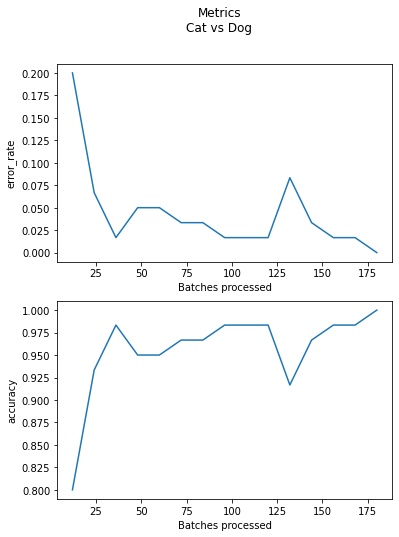

In [13]:
m_cat_dog = learn_cat_dog.recorder.plot_metrics(return_fig=True)
m_cat_dog.suptitle('Metrics\nCat vs Dog')
plt.show()

Se apreciaron fluctuaciones en el la tasa de error que se reflejaron en la precisión. No obstante, dichas variaciones al final del entrenamiento no superan 5% de cambio neto en la precisión.

#### Pérdida

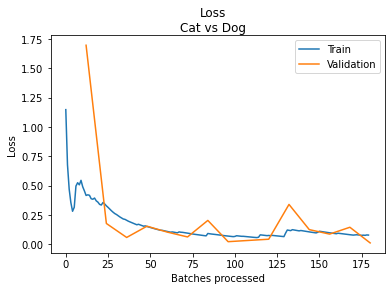

In [14]:
l_cat_dog = learn_cat_dog.recorder.plot_losses(return_fig=True)
l_cat_dog.suptitle('Loss\nCat vs Dog')
plt.show()

Las pérdidas de entrenamiento y validación no se encuentran distanciadas por lo que se concluye que el modelo cuenta con un bajo sesgo.

#### Matriz de confusión

In [15]:
interp_cat_dog = ClassificationInterpretation.from_learner(learn_cat_dog)

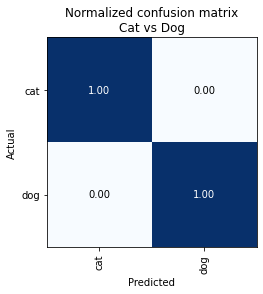

In [16]:
cm_cat_dog = interp_cat_dog.plot_confusion_matrix(normalize=True, return_fig=True,title="Normalized confusion matrix\nCat vs Dog")
plt.show()

No se apreció presencia significativa de falsos negativos y falsos positivos. No se presume overfitting/underfitting.

### Pruebas

Se carga el directorio con imágenes de prueba (perros y gatos que el modelo no ha "visto" aún).

In [17]:
path_test = Path("./drive/MyDrive/cat_dog/test")
il = ImageList.from_folder(path_test)

A continuación, un perro.

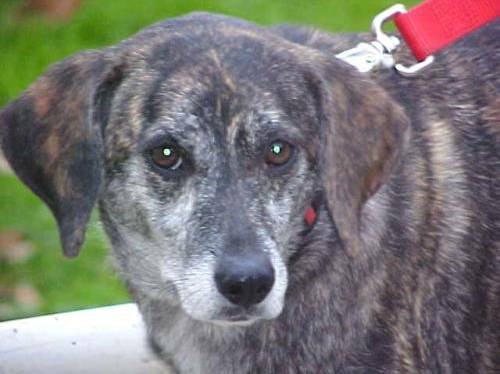

In [18]:
il.open(il.items[0])

In [19]:
cat_dog,_,_ = learn_cat_dog.predict(il.open(il.items[0]))
print(cat_dog)

dog


A continuación, un gato.

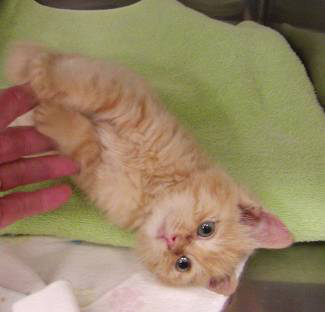

In [20]:
il.open(il.items[1])

In [21]:
cat_dog,_,_ = learn_cat_dog.predict(il.open(il.items[1]))
print(cat_dog)

cat
